In [79]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [2]:
df1 = pd.read_csv('knn_data.csv')

In [3]:
df2 = df1.drop(['id'],axis=1)

In [4]:
X=df2.iloc[:,1:32]
y=df2['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1,stratify=y)

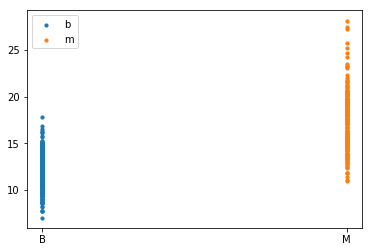

In [71]:
diag = df2.copy(deep=True)
s1 = pd.Series(y)
y11 = s1.map({'B':1, 'M':0})
diag['y11'] = y11
b = diag.loc[y11 == 1]
m = diag.loc[y11 == 0]
plt.scatter(b.iloc[:, 0], b.iloc[:, 1], s=10, label='b')
plt.scatter(m.iloc[:, 0], m.iloc[:, 1], s=10, label='m')
plt.legend()
plt.show()
#Scatter plot for B and M

In [74]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [75]:
y_pred = model.predict(X_test)[0:len(X_test)]
print(y_pred)

['B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M'
 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B'
 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B'
 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B']


/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


In [76]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[103   4]
 [  7  57]]


In [77]:
model.score(X_test,y_test) #Calculating the accuracy of our model on the test dataset.

/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


0.935672514619883

In [20]:
#train model with cv of 10 
cv_scores = cross_val_score(model, X, y, cv=10)

/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationW

In [23]:
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.93103448 0.89655172 0.85964912 0.92982456 0.98245614 0.96491228
 0.9122807  0.96428571 0.92857143 0.94642857]
cv_scores mean:0.93159947282


In [24]:
knn2 = KNeighborsClassifier()

In [28]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X, y)

/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationW

/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationW

/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationW

/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationW

/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationW

/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/abhishek/.local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationW

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 5}

In [30]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9367311072056239

In [102]:
s1 = pd.Series(y_test)
y_true = np.array(y_test)
y_true = s1.map({'B':0, 'M':1}) #This mapping is done because ROC_Curve expects us to give one value a positive label eg. 1 for positive and other gets automatically assigned as negative which is 0.
s2 = pd.Series(y_pred)
y_scores = np.array(y_pred)
y_scores = s2.map({'B':0, 'M':1})
fpr, tpr, threshold = metrics.roc_curve(y_true, y_scores)
print(tpr)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc) #Computes the area under the curve.

[0.       0.890625 1.      ]
0.9266209112149533


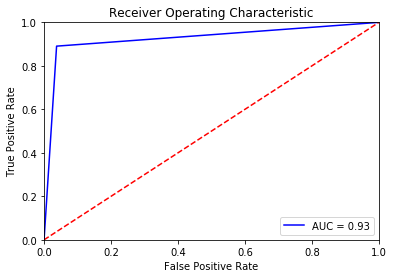

In [103]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#We evaluate different models through ROC Curve. The more the Blue line is near the top left corner the more accurate is the model.
